In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
!pip install ta
import ta

     |████████████████████████████████| 6.4 MB 4.2 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=26b7a7acfe688fcd52510bb8d1ab021a6fec26d82d5ccbb5d42c77723147ee46
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a98

In [ ]:
# Importing the dataset from Yahoo finance.
Intel_data = yf.download("INTC",
                 start = "2021-01-01",
                 end = "2021-12-31")
Intel_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,49.889999,51.389999,49.400002,49.669998,48.050385,46102500
2021-01-05,49.450001,50.830002,49.330002,50.610001,48.959728,24866600
2021-01-06,50.439999,52.150002,50.200001,51.099998,49.433754,36809600
2021-01-07,51.490002,52.689999,51.299999,52.189999,50.488213,32092300
2021-01-08,52.450001,52.529999,51.270000,51.650002,49.965824,34625400


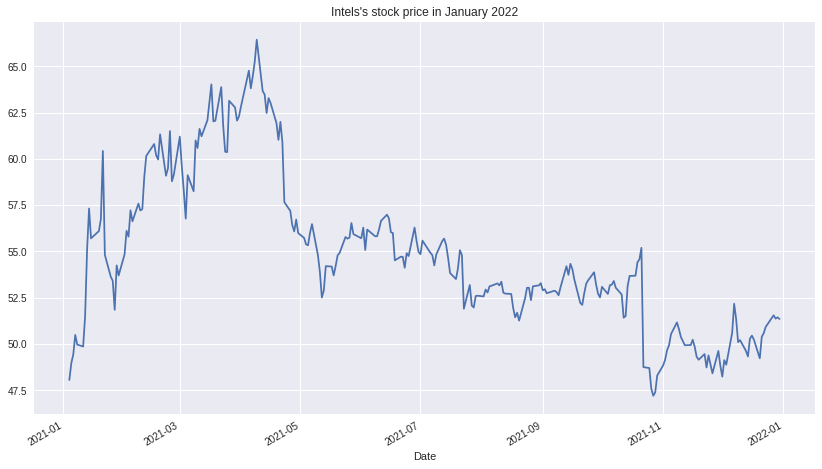

In [ ]:
# Ploting Intels stock price (based on the Adj Close price)
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14, 8]
Intel_data["Adj Close"].plot(title = "Intels's stock price in January 2022")

In [ ]:
# Creating new dataset for bollinger bands.
bollinger_bands = ta.volatility.BollingerBands(close=Intel_data["Adj Close"], window = 5, window_dev = 2)
BB_df = Intel_data.copy()
BB_df["Moving_Average"] = bollinger_bands.bollinger_mavg()
BB_df["High"] = bollinger_bands.bollinger_hband()
BB_df["Low"] = bollinger_bands.bollinger_lband()
BB_df.head()

,Open,High,Low,Close,Adj Close,Volume,Moving_Average
Date,,,,,,,
2021-01-04,49.889999,NaN,NaN,49.669998,48.050385,46102500,NaN
2021-01-05,49.450001,NaN,NaN,50.610001,48.959728,24866600,NaN
2021-01-06,50.439999,NaN,NaN,51.099998,49.433754,36809600,NaN
2021-01-07,51.490002,NaN,NaN,52.189999,50.488213,32092300,NaN
2021-01-08,52.450001,51.05737,47.701792,51.650002,49.965824,34625400,49.379581


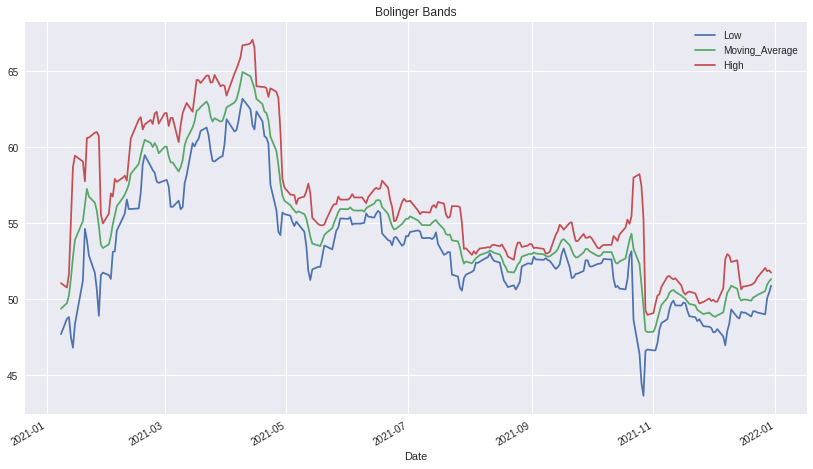

In [ ]:
# Plotting Bollinger Bands
BB_df[["Low", "Moving_Average", "High"]].plot(title = "Bolinger Bands")

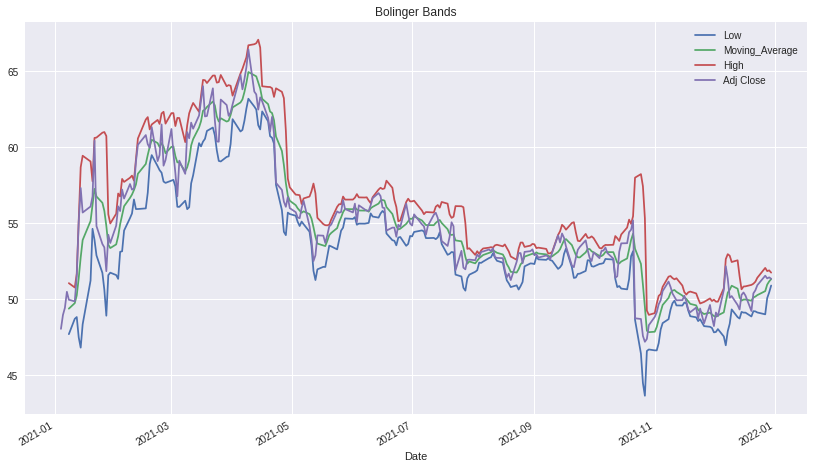

In [ ]:
# Plotting Bollinger Bands with Intels stock price
BB_df[["Low", "Moving_Average", "High","Adj Close"]].plot(title = "Bolinger Bands")